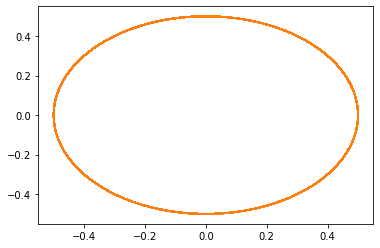

In [5]:
##### orbits are functions in two variables, x, y

#We will have 8 variables: x,y,xv,yv for both objects.
#in order, we have [x1,y1,xv1,yv1]
#[x2,y2,xv2,yv2]
#initialise with velocities perpendicular to a perfect circle, for eccentricity = 0:
# We need keplerian velocity: sqrt(gm^2/r)


#Start from R-K in lecture 7-1
import numpy as np
import matplotlib.pyplot as plt

G=1.
M=1.
tend=200.*np.pi #for 100 orbits
h=0.01
t=0
#given G = M = 1, r_initial = .5 away from centre of gravity, initial Keplerian velocity is .5
#in order to cause a change, we need to perturb away from .5
y1=[.5,0.,0.,.5]
y2=[-.5,0.,0.,-.5]
#modify to take r parameter
def f(t, y, r):
    f=np.zeros(4)
    #r=np.sqrt(y[0]*y[0]+y[2]*y[2])
    f[0]=y[1]
    f[1]=-G*M/r/r/r*y[0]
    f[2]=y[3]
    f[3]=-G*M/r/r/r*y[2]
    return f

#we will use this twice
#modify to include an r input parameter, to capture the linking between the 
def rk4(t, h, y, r, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y,r)
    k2=h*f(t+0.5*h,y+0.5*k1,r)
    k3=h*f(t+.5*h,y+.5*k2,r)
    k4=h*f(t+h,y+k3,r)
    y+=(1/6)*(k1+2*k2+2*k3+k4)
    return y

xp1=[]
yp1=[]
xp2=[]
yp2=[]
while(t<tend):
     
    r = np.sqrt(((y1[0]-y2[0])**2)+((y1[2]-y2[2])**2))
    #print('r is ',r)
    if((t+h)<tend):
        #h=tend-t
        y1 = rk4(t,h,y1,r,4)
        y2 = rk4(t,h,y2,r,4)

    xp2=np.append(xp2,y2[0])
    yp2=np.append(yp2,y2[2])
    xp1=np.append(xp1,y1[0])
    yp1=np.append(yp1,y1[2])
    if xp1[-1]<-1:
        print(y1)
        break
    t = t+h
fig = plt.figure()

plt.plot(xp1,yp1)
plt.plot(xp2,yp2)
plt.show()